In [1]:
# Uncomment the below line and Install 'mlxtend' Library if not installed already
!pip install mlxtend

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import mlxtend

In [3]:
import pandas as pd
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder

import matplotlib.pyplot as plt

In [4]:
from google.colab import files
uploaded=files.upload()

Saving my_movies.csv to my_movies.csv


In [5]:
movie=pd.read_csv("my_movies.csv")
movie

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
5,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,NaN,NaN,NaN,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,NaN,NaN,NaN,0,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,Gladiator,Green Mile,NaN,1,1,0,0,0,0,0,1,0,1


In [6]:
movie.head()

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0


In [7]:
movie.tail()

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
5,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,NaN,NaN,NaN,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,NaN,NaN,NaN,0,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,Gladiator,Green Mile,NaN,1,1,0,0,0,0,0,1,0,1


In [8]:
movie.describe()

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.600000,0.700000,0.200000,0.200000,0.600000,0.200000,0.100000,0.100000,0.100000,0.200000
std,0.516398,0.483046,0.421637,0.421637,0.516398,0.421637,0.316228,0.316228,0.316228,0.421637
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
movie.isnull().any()

V1               False
V2               False
V3                True
V4                True
V5                True
Sixth Sense      False
Gladiator        False
LOTR1            False
Harry Potter1    False
Patriot          False
LOTR2            False
Harry Potter2    False
LOTR             False
Braveheart       False
Green Mile       False
dtype: bool

In [10]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   V1             10 non-null     object
 1   V2             10 non-null     object
 2   V3             7 non-null      object
 3   V4             2 non-null      object
 4   V5             1 non-null      object
 5   Sixth Sense    10 non-null     int64 
 6   Gladiator      10 non-null     int64 
 7   LOTR1          10 non-null     int64 
 8   Harry Potter1  10 non-null     int64 
 9   Patriot        10 non-null     int64 
 10  LOTR2          10 non-null     int64 
 11  Harry Potter2  10 non-null     int64 
 12  LOTR           10 non-null     int64 
 13  Braveheart     10 non-null     int64 
 14  Green Mile     10 non-null     int64 
dtypes: int64(10), object(5)
memory usage: 1.3+ KB


In [12]:
#Data Structure 
print(type(movie))
print(movie.shape)

<class 'pandas.core.frame.DataFrame'>
(10, 15)


In [13]:
movie.dtypes

V1               object
V2               object
V3               object
V4               object
V5               object
Sixth Sense       int64
Gladiator         int64
LOTR1             int64
Harry Potter1     int64
Patriot           int64
LOTR2             int64
Harry Potter2     int64
LOTR              int64
Braveheart        int64
Green Mile        int64
dtype: object

In [14]:
movie.duplicated()

0    False
1    False
2    False
3    False
4     True
5     True
6    False
7    False
8     True
9    False
dtype: bool

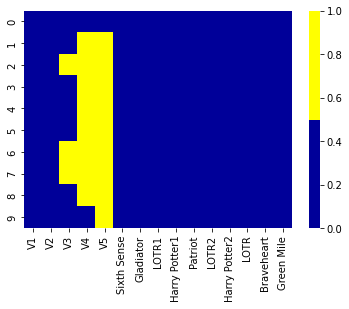

In [15]:
import seaborn as sns
cols = movie.columns 
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(movie[cols].isnull(),
            cmap=sns.color_palette(colours))

In [16]:
df=pd.get_dummies(movie)
df.head(),df.tail()

(   Sixth Sense  Gladiator  LOTR1  Harry Potter1  Patriot  LOTR2  \
 0            1          0      1              1        0      1   
 1            0          1      0              0        1      0   
 2            0          0      1              0        0      1   
 3            1          1      0              0        1      0   
 4            1          1      0              0        1      0   
 
    Harry Potter2  LOTR  Braveheart  Green Mile  ...  V2_LOTR  V2_LOTR1  \
 0              0     0           0           1  ...        0         1   
 1              0     0           1           0  ...        0         0   
 2              0     0           0           0  ...        0         0   
 3              0     0           0           0  ...        0         0   
 4              0     0           0           0  ...        0         0   
 
    V2_LOTR2  V2_Patriot  V3_Braveheart  V3_Gladiator  V3_Harry Potter1  \
 0         0           0              0             0          

Apriori Algorithm

In [23]:
frequent_itemsets = apriori(df, min_support=0.1, use_colnames=True)
frequent_itemsets['length']=frequent_itemsets['itemsets'].apply(lambda x:len(x))

In [24]:
frequent_itemsets

,support,itemsets,length
0,0.6,(Sixth Sense),1
1,0.7,(Gladiator),1
2,0.2,(LOTR1),1
3,0.2,(Harry Potter1),1
4,0.6,(Patriot),1
...,...,...,...
1392,0.1,"(LOTR1, V4_Green Mile, V5_LOTR2, Harry Potter1...",9
1393,0.1,"(LOTR1, V4_Green Mile, LOTR2, V5_LOTR2, V2_LOT...",9
1394,0.1,"(V4_Green Mile, LOTR2, V5_LOTR2, Harry Potter1...",9
1395,0.1,"(LOTR1, V4_Green Mile, LOTR2, V5_LOTR2, Harry ...",9


In [25]:
rules=association_rules(frequent_itemsets,metric = 'lift' ,min_threshold=0.7)

In [26]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80
2,(LOTR1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80
3,(Sixth Sense),(LOTR1),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96
4,(Harry Potter1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80
...,...,...,...,...,...,...,...,...,...
64247,(V1_Sixth Sense),"(LOTR1, V4_Green Mile, LOTR2, V5_LOTR2, Harry ...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
64248,(V2_LOTR1),"(LOTR1, V4_Green Mile, LOTR2, V5_LOTR2, Harry ...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
64249,(V3_Harry Potter1),"(LOTR1, V4_Green Mile, LOTR2, V5_LOTR2, Harry ...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
64250,(Sixth Sense),"(LOTR1, V4_Green Mile, LOTR2, V5_LOTR2, Harry ...",0.6,0.1,0.1,0.166667,1.666667,0.04,1.08


In [27]:
rules[rules.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80
6,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20
7,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20
10,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.000000,1.666667,0.04,inf
...,...,...,...,...,...,...,...,...,...
64247,(V1_Sixth Sense),"(LOTR1, V4_Green Mile, LOTR2, V5_LOTR2, Harry ...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
64248,(V2_LOTR1),"(LOTR1, V4_Green Mile, LOTR2, V5_LOTR2, Harry ...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
64249,(V3_Harry Potter1),"(LOTR1, V4_Green Mile, LOTR2, V5_LOTR2, Harry ...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
64250,(Sixth Sense),"(LOTR1, V4_Green Mile, LOTR2, V5_LOTR2, Harry ...",0.6,0.1,0.1,0.166667,1.666667,0.04,1.08


In [18]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)
rules
rules.sort_values('lift',ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
32108,"(Harry Potter1, Sixth Sense, Green Mile, V3_Ha...","(LOTR1, LOTR2, V5_LOTR2)",0.1,0.1,0.1,1.0,10.0,0.09,inf
33436,"(LOTR1, LOTR2, Harry Potter1, V3_Harry Potter1...",(V5_LOTR2),0.1,0.1,0.1,1.0,10.0,0.09,inf
33414,"(LOTR2, V4_Green Mile)","(LOTR1, V5_LOTR2, Harry Potter1, V2_LOTR1, Six...",0.1,0.1,0.1,1.0,10.0,0.09,inf
33415,"(Harry Potter1, V5_LOTR2)","(LOTR1, LOTR2, V2_LOTR1, Sixth Sense, V4_Green...",0.1,0.1,0.1,1.0,10.0,0.09,inf
33416,"(V2_LOTR1, V5_LOTR2)","(LOTR1, LOTR2, Harry Potter1, Sixth Sense, V4_...",0.1,0.1,0.1,1.0,10.0,0.09,inf
...,...,...,...,...,...,...,...,...,...
1631,"(Green Mile, V4_Green Mile)","(Gladiator, Sixth Sense)",0.2,0.5,0.1,0.5,1.0,0.00,1.0
243,(V4_Green Mile),"(Gladiator, Sixth Sense)",0.2,0.5,0.1,0.5,1.0,0.00,1.0
6262,"(V4_Green Mile, V1_Sixth Sense, Green Mile)","(Gladiator, Sixth Sense)",0.2,0.5,0.1,0.5,1.0,0.00,1.0
1695,"(Gladiator, Sixth Sense)","(V1_Sixth Sense, V4_Green Mile)",0.5,0.2,0.1,0.2,1.0,0.00,1.0


In [19]:
rules.sort_values('lift',ascending = False)[0:20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
32108,"(Harry Potter1, Sixth Sense, Green Mile, V3_Ha...","(LOTR1, LOTR2, V5_LOTR2)",0.1,0.1,0.1,1.0,10.0,0.09,inf
33436,"(LOTR1, LOTR2, Harry Potter1, V3_Harry Potter1...",(V5_LOTR2),0.1,0.1,0.1,1.0,10.0,0.09,inf
33414,"(LOTR2, V4_Green Mile)","(LOTR1, V5_LOTR2, Harry Potter1, V2_LOTR1, Six...",0.1,0.1,0.1,1.0,10.0,0.09,inf
33415,"(Harry Potter1, V5_LOTR2)","(LOTR1, LOTR2, V2_LOTR1, Sixth Sense, V4_Green...",0.1,0.1,0.1,1.0,10.0,0.09,inf
33416,"(V2_LOTR1, V5_LOTR2)","(LOTR1, LOTR2, Harry Potter1, Sixth Sense, V4_...",0.1,0.1,0.1,1.0,10.0,0.09,inf
33417,"(V5_LOTR2, Sixth Sense)","(LOTR1, LOTR2, Harry Potter1, V2_LOTR1, V4_Gre...",0.1,0.1,0.1,1.0,10.0,0.09,inf
33418,"(V5_LOTR2, V4_Green Mile)","(LOTR1, LOTR2, Harry Potter1, V2_LOTR1, Sixth ...",0.1,0.1,0.1,1.0,10.0,0.09,inf
33419,"(Harry Potter1, V2_LOTR1)","(LOTR1, LOTR2, V5_LOTR2, Sixth Sense, V4_Green...",0.1,0.1,0.1,1.0,10.0,0.09,inf
33420,"(Harry Potter1, Sixth Sense)","(LOTR1, LOTR2, V5_LOTR2, V2_LOTR1, V4_Green Mile)",0.1,0.1,0.1,1.0,10.0,0.09,inf
33421,"(Harry Potter1, V4_Green Mile)","(LOTR1, LOTR2, V5_LOTR2, V2_LOTR1, Sixth Sense)",0.1,0.1,0.1,1.0,10.0,0.09,inf


In [28]:
frequent_itemsets = apriori(df,min_support=.150,use_colnames=True)
frequent_itemsets['length']=frequent_itemsets['itemsets'].apply(lambda x:len(x))

In [29]:
rules1=association_rules(frequent_itemsets,metric = 'lift' ,min_threshold=0.9)

In [30]:
rules1[rules1.lift>1]


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
2,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
4,(Sixth Sense),(Green Mile),0.6,0.2,0.2,0.333333,1.666667,0.08,1.2
...,...,...,...,...,...,...,...,...,...
649,(V2_Patriot),"(Patriot, Sixth Sense, Gladiator, V3_Sixth Sen...",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8
650,(V1_Gladiator),"(Patriot, V2_Patriot, Gladiator, V3_Sixth Sens...",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8
651,(Gladiator),"(Patriot, V2_Patriot, Sixth Sense, V3_Sixth Se...",0.7,0.4,0.4,0.571429,1.428571,0.12,1.4
652,(V3_Sixth Sense),"(Patriot, V2_Patriot, Sixth Sense, Gladiator, ...",0.4,0.4,0.4,1.000000,2.500000,0.24,inf


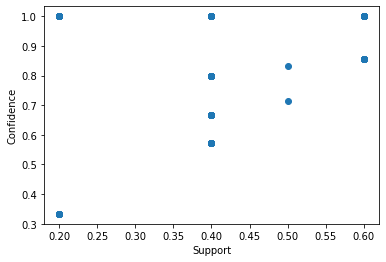

In [31]:
import matplotlib.pyplot as plt
plt.scatter(rules1['support'],rules1['confidence'])
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.show()

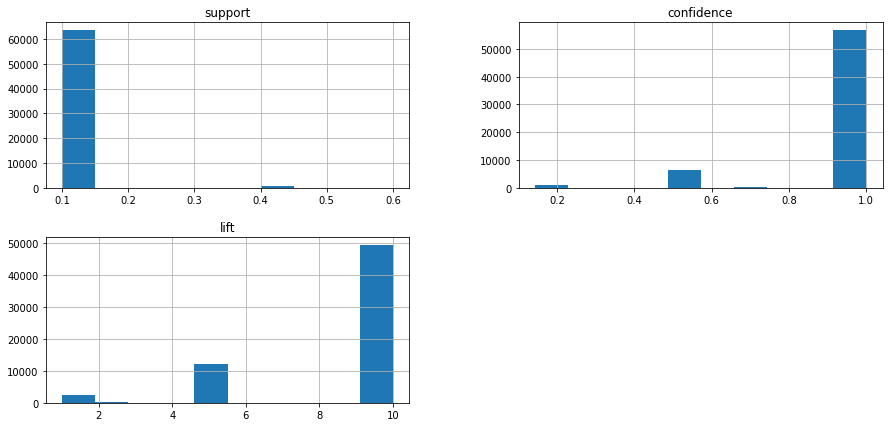

In [20]:
import matplotlib.pyplot as plt
rules[['support','confidence','lift']].hist(figsize=(15,7))
plt.show()

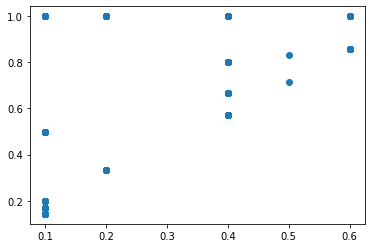

In [21]:
import matplotlib.pyplot as plt

plt.scatter(rules['support'], rules['confidence'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


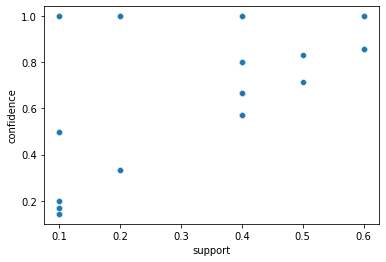

In [22]:
import seaborn as sns

sns.scatterplot('support', 'confidence', data=rules,)

plt.show()